# #####       				Exercice 1 (9 points) 		    	 	#####


# L'objectif de cet exercice est de retourner le problème de ML titanic : on essaye de prédire le sexe en fonction des autres variables ?

vous répondez aux questions suivantes :


In [2]:
#Importation des packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

- Lire le jeu de données titanic.csv ? (0.25 pt)


In [3]:
dataframe = pd.read_csv('titanic.csv')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
pclass      1309 non-null object
survived    1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 61.5+ KB


In [9]:
def resume_table(df):
    print("taille du dataset : \n{} observations et {} colonnes".format(df.shape[0], df.shape[1]))
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().mean().values.round(2)    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    return summary

In [10]:
resume_table(dataframe)

taille du dataset : 
1309 observations et 6 colonnes


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,pclass,object,0.0,3,1st,1st,1st
1,survived,object,0.0,2,survived,survived,died
2,sex,object,0.0,2,female,male,female
3,age,float64,0.2,98,29,0.9167,2
4,sibsp,int64,0.0,7,0,1,1
5,parch,int64,0.0,8,0,2,2


- Décrire et representer graphiquement chaque colonne ? (1 pt)
		Indice : a) variable quantitative : min, q1, moy, mediane, q3, max et l'écart-type
				 b) variable qualitative : tri à plat (effectif et pourcentage) ?


In [13]:
variable_qualitative = dataframe.select_dtypes(include='object').columns.tolist()
variable_quantitative = dataframe.select_dtypes(include=['int64','float64']).columns.tolist()
print("variables qualitatives : {}\nvariables quantitatives : {}".format(variable_qualitative, variable_quantitative))

variables qualitatives : ['pclass', 'survived', 'sex']
variables quantitatives : ['age', 'sibsp', 'parch']


In [30]:
dataframe.select_dtypes(include='object')

,pclass,survived,sex
0,1st,survived,female
1,1st,survived,male
2,1st,died,female
3,1st,died,male
4,1st,died,female
...,...,...,...
1304,3rd,died,female
1305,3rd,died,female
1306,3rd,died,male
1307,3rd,died,male


In [33]:
def resume_variables_quantitatives(df):
    d = df.select_dtypes(include=['int64','float64'])
    print("taille du dataset : \n{} observations et {} colonnes".format(d.shape[0], d.shape[1]))
    summary = pd.DataFrame(d.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['min'] = round(d.min(), 2).values
    summary['q1'] = round(d.quantile(.1),2).values
    summary['moy'] = round(d.mean(),2).values
    summary['mediane'] = round(d.median(),2).values
    summary['q3'] = round(d.quantile(.3),2).values
    summary['max'] = round(d.max(),2).values
    summary['ecart-type'] = round(d.std(),2).values
    
    return summary

In [34]:
resume_variables_quantitatives(dataframe)

taille du dataset : 
1309 observations et 3 colonnes


,Name,dtypes,min,q1,moy,mediane,q3,max,ecart-type
0,age,float64,0.17,14.0,29.88,28.0,22.0,80.0,14.41
1,sibsp,int64,0.00,0.0,0.50,0.0,0.0,8.0,1.04
2,parch,int64,0.00,0.0,0.39,0.0,0.0,9.0,0.87


In [67]:
def resume_variables_qualitatives(df):
    d = df.select_dtypes(include='object')
    for i in d.columns:
        print('la variable {} : a {} modalités\n'.format(i, d[i].value_counts().count()))
        print(d[i].value_counts()/d.shape[0])


In [68]:
resume_variables_qualitatives(dataframe)

la variable pclass : a 3 modalités

3rd    0.541635
1st    0.246753
2nd    0.211612
Name: pclass, dtype: float64
la variable survived : a 2 modalités

died        0.618029
survived    0.381971
Name: survived, dtype: float64
la variable sex : a 2 modalités

male      0.644003
female    0.355997
Name: sex, dtype: float64


- Décrire et representer graphiquement les deux sous populations (Hommes et Femmes) suivant chaque feature ? (1 pt)
		Indice : tri croisé



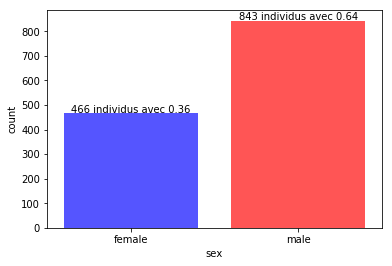

In [96]:
ax = sns.countplot(x='sex', data=dataframe, palette='seismic', saturation=1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{} individus avec {:1.2f}'.format(height, height/dataframe.shape[0]),
            ha="center") 

- Calculer et représenter graphiquement la matrice de corrélation ? (0.5 pt)
		Indice : heat map



In [85]:
list1 = ['pclass', 'survived', 'sex']
data = pd.get_dummies(dataframe, columns=list1, drop_first=True)

Text(0.5, 1.0, 'Matrice de correlation')

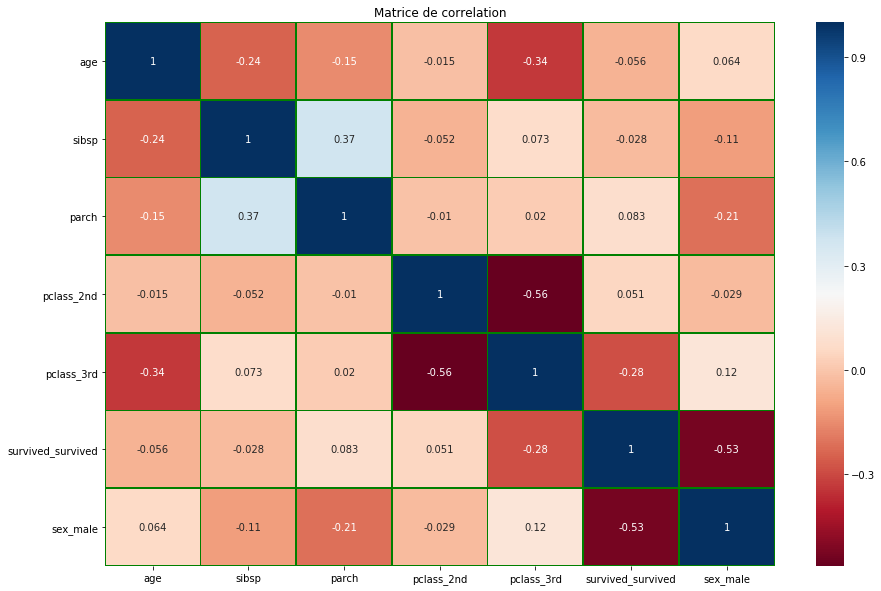

In [110]:
#sns.heatmap(data.corr())

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.7, cmap = 'RdBu', linecolor="green")
title = "Matrice de correlation"
plt.title(title)

- Réservez 25% des exemples pour le test et 75% pour l’apprentissage avec une graine = 42 ? (0.25 pt)


In [111]:
meadian_value = data['age'].median()
data['age'] = data['age'].fillna(meadian_value)

In [112]:
data.columns

Index(['age', 'sibsp', 'parch', 'pclass_2nd', 'pclass_3rd',
       'survived_survived', 'sex_male'],
      dtype='object')

In [126]:
data_ = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [179]:
X = data_.values
y = target.values

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(981, 6) (981,) (328, 6) (328,)


- Apprendre les exemples du train à l'aide des classifieurs suivants : arbre de décision, ranfomForest (500 itérations) et knn (5 voisins). (1.5 pts)
	Indice : lorsqu'il le faut, utiliser la même graine (42)



In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score

def cal_accuracy(model_name, y_test, y_pred):
    acc = (accuracy_score(y_test,y_pred)*100)
    print("\nAccuracy : {}".format(acc))
    cm1 = confusion_matrix(y_test, y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm1,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    title = str(model_name)+" Confusion Matrix"
    plt.title(title)
    return acc


Accuracy : 71.64634146341463


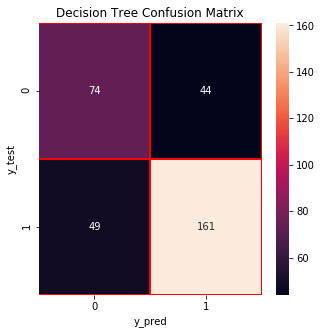

In [171]:
#arbre de décision
from sklearn.tree import DecisionTreeClassifier
classifier={}

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

acc_dt = cal_accuracy("Decision Tree", y_test, y_pred)
classifier['DecisionTree'] = acc_dt


Accuracy : 74.08536585365853


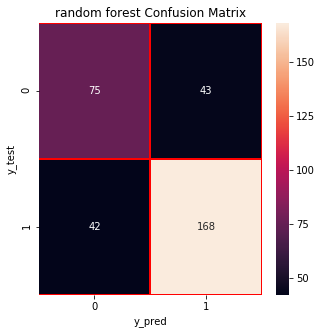

In [172]:
#random_forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500,random_state=42)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

acc_rf = cal_accuracy("random forest", y_test, y_pred)
classifier['randomForest'] = acc_rf


Accuracy : 64.02439024390245


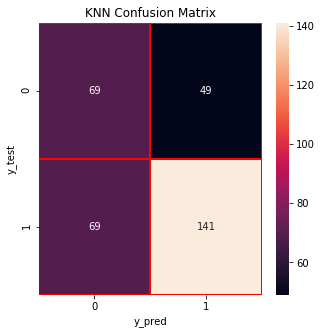

In [173]:
#knn
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

acc_knn = cal_accuracy("KNN", y_test, y_pred)
classifier['KNN'] = acc_knn

- Pr le premier classifieur, dessiner l'arbre et établir les régles ? (0.5 pt)



In [128]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
try:    
    col_names = data_.columns.tolist()
    dot_data = StringIO()  
    export_graphviz(model_dt, out_file=dot_data,  
                    feature_names=col_names,  class_names=(["Male" if int(i) is 1 else "Female" for i in np.unique(y)]),
                    filled=True, rounded=True,
                    proportion=True,
                    special_characters=True)  
    (graph,) = pydotplus.graph_from_dot_data(dot_data.getvalue())


    Image(graph.create_png())
except:
    print("désolé et comme je vous ai dis, j'ai un probleme avec graphviz")

désolé et comme je vous ai dis, j'ai un probleme avec graphviz


- Pr le randomForest, donner la liste des variables les plus importantes sous la forme d'un graphe ? (0.25 pt)


In [129]:
def variable_importance(fit):
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [130]:
var_imp_rf = variable_importance(model_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

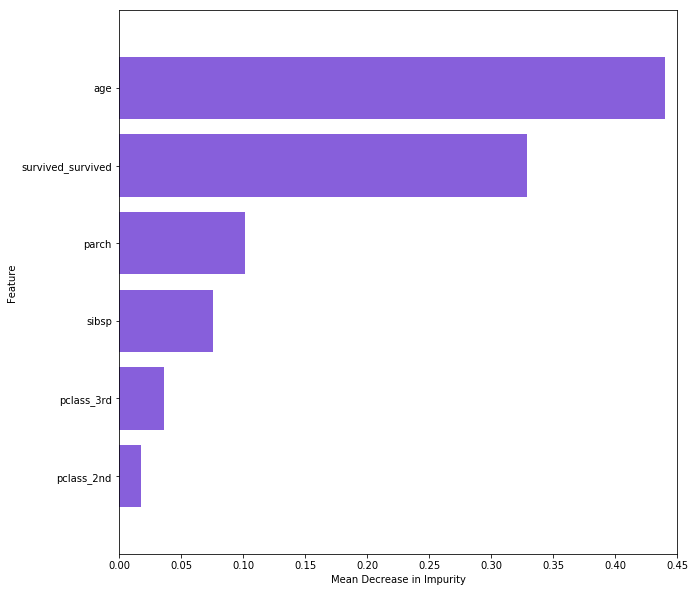

In [137]:
def variable_importance_plot(importance, indices, col_names):
    index = np.arange(len(col_names))
    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(col_names[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 6)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

variable_importance_plot(importances_rf, indices_rf, col_names)

- Calculer la matrice de confusion et l'erreur de chaque classifieur ? Quelle est le modèle qui fournit l'erreur la plus faible ? (1.25 pts)


In [174]:
max(classifier, key=classifier.get)

'randomForest'

- A l'aide de la méthode de validation croisée avec 10 folds, calculer l'erreur de chaque modèle ? Quel modèle fournit maintenant l'erreur la plus faible ? (1 pt)


In [204]:
from sklearn.model_selection import cross_val_score
cv_bests={}
knn = KNeighborsClassifier(n_neighbors=5)
score_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
cv_bests['KNN'] = score_knn.max()

model_dt = DecisionTreeClassifier(random_state=42)
score_dt = cross_val_score(model_dt, X, y, cv=10, scoring='accuracy')
cv_bests['DT'] = score_dt.max()

model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
score_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
cv_bests['RF'] = score_rf.max()

max(cv_bests, key=cv_bests.get)

'RF'

- Optimiser les hyperparamètres de chaque modèle à l'aide de la méthode de validation croisée (tjrs 10 folds) en se limitant :
		pr le knn à k (nombre de voisins),
		arbre de décision (information : entropie et gini ; la profondeur de l'arbre),
		randomForest (un seul hyperparatmètre : nombre de variables utilisées d'une façon aléatoire lors de chaque split) ; les autres hyperpamètres sont gardés par défaut. (1 pt)


# KNN

Text(0, 0.5, 'Cross-Validated Accuracy')

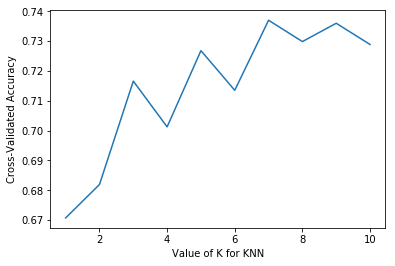

In [182]:
# Trouver la valeur optimale K (KNN)
from sklearn.model_selection import cross_val_score

k_range = range(1, 11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


Accuracy : 70.73170731707317


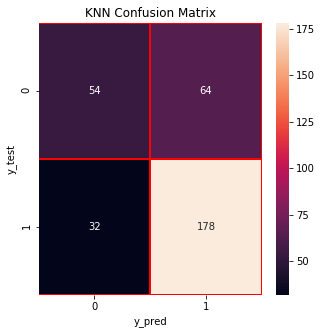

In [205]:
best_knn = np.array(k_scores).argmax()+1
model_knn = KNeighborsClassifier(n_neighbors=best_knn)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

acc_knn = cal_accuracy("KNN", y_test, y_pred)
d_after['KNN'] = acc_knn

# randomForest (un seul hyperparatmètre : nombre de variables utilisées d'une façon aléatoire lors de chaque split)

In [188]:
from sklearn.model_selection import GridSearchCV

param_dist = {'max_features': ['auto', 2,3,4,5,6]
             }

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'max_features': 5}


In [189]:
model_rf.set_params(max_features = 5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Accuracy : 74.08536585365853


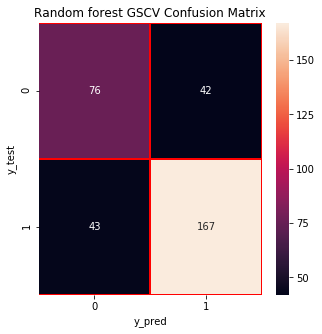

In [192]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
d_after = {}
d_after["Random forest GSCV"] = cal_accuracy("Random forest GSCV", y_test, y_pred)

# arbre de décision (information : entropie et gini ; la profondeur de l'arbre)

In [197]:
param_dist = {'max_depth': range(1,10),
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(X_train, y_train)
print(' Decision Tree GSCV Best Parameters using grid search: \n', 
      cv_dt.best_params_)

 Decision Tree GSCV Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 1}


In [198]:
model_dt.set_params(criterion = 'entropy', 
                    max_depth = 1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy : 78.04878048780488


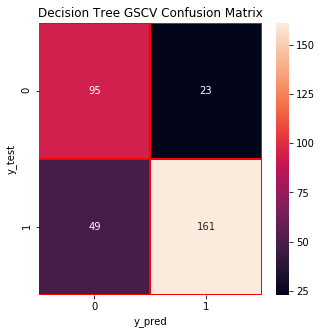

In [199]:
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

d_after["Decision Tree GSCV"] = cal_accuracy("Decision Tree GSCV", y_test, y_pred)

- Fournir la meilleure spécification et l'erreur de chaque modèle après optimisation ? (0.5 pt)


In [200]:
print(' Decision Tree GSCV Best Parameters using grid search: ', cv_dt.best_params_)
print(' Random Forest Best Parameters using grid search: ', cv_rf.best_params_)
print(d_after)

 Decision Tree GSCV Best Parameters using grid search:  {'criterion': 'gini', 'max_depth': 1}
 Random Forest Best Parameters using grid search:  {'criterion': 'entropy', 'max_depth': 2}
{'Random forest GSCV': 74.08536585365853, 'Decision Tree GSCV': 78.04878048780488}


- Lequel des modèles qui fournit maintenant l'erreur la plus faible ? (0.5 pt)



In [208]:
print('le meilleur modele est : {}'.format(max(d_after, key=d_after.get)))

le meilleur modele est : Decision Tree GSCV
